In [3]:
import pandas as pd

# مسیر فایل اکسل خودت رو جایگزین کن
file_path = 'C:/Users/Nastaran/Desktop/UniversityConstructor/semester4/Final 08042025/Data/Syllabus.xlsx'

# فرض: ستون‌های فایل شما اسمشون "Course" و "Topic" هست
df = pd.read_excel(file_path)

# فقط ستون 'Topic' رو جدا می‌کنیم برای تبدیل به بردار
topics = df['Topic'].astype(str).tolist()


In [4]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# بارگذاری مدل
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# تبدیل متون به بردار
embeddings = model.encode(topics)

# محاسبه ماتریس شباهت
similarity_matrix = cosine_similarity(embeddings)

# نمایش نتایج به صورت DataFrame برای خوانایی بیشتر
similarity_df = pd.DataFrame(similarity_matrix, index=df['Topic'], columns=df['Topic'])

# نمایش خروجی
print(similarity_df)


Topic                                               Introduction, The role of data analytics in the data science workflow   \
Topic                                                                                                                        
Introduction, The role of data analytics in the...                                           1.000000                        
Supervised Learning: A recap on Linear regression                                            0.179172                        
Data Analytics Pipeline: Pre-processing, Some f...                                           0.668058                        
Exploratory Data Analysis                                                                    0.462296                        
Supervised Learning: Classification                                                          0.221985                        
Classification with Regression Trees                                                         0.177571                 

In [5]:
import pandas as pd

# مسیر فایل اکسل رو به صورت صحیح وارد کن
df = pd.read_excel('C:/Users/Nastaran/Desktop/UniversityConstructor/semester4/Final 08042025/Data/Syllabus.xlsx')

# اطمینان از اینکه داده‌ها درست هستند
print(df.head())


                                               Topic          Course
0  Introduction, The role of data analytics in th...  Data Analytics
1  Supervised Learning: A recap on Linear regress...  Data Analytics
2  Data Analytics Pipeline: Pre-processing, Some ...  Data Analytics
3                         Exploratory Data Analysis   Data Analytics
4               Supervised Learning: Classification   Data Analytics


In [6]:
from sentence_transformers import SentenceTransformer

# بارگذاری مدل
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# تبدیل متن‌ها به بردار
topics = df['Topic'].astype(str).tolist()
embeddings = model.encode(topics)


In [7]:
from sklearn.metrics.pairwise import cosine_similarity

# محاسبه ماتریس شباهت
similarity_matrix = cosine_similarity(embeddings)

# تبدیل به DataFrame برای نمایش
similarity_df = pd.DataFrame(similarity_matrix, index=df['Topic'], columns=df['Topic'])


In [8]:
import numpy as np

# ایجاد یک DataFrame با ستون‌های Course و Topic
df['Course'] = df['Course'].astype(str)
df['Topic'] = df['Topic'].astype(str)

# ذخیره نتایج شباهت‌های قوی بین تاپیک‌های درس‌های مختلف
results = []

for i in range(len(df)):
    for j in range(i+1, len(df)):
        course_i, topic_i = df.iloc[i]['Course'], df.iloc[i]['Topic']
        course_j, topic_j = df.iloc[j]['Course'], df.iloc[j]['Topic']
        sim_score = similarity_matrix[i][j]

        # فقط اگر از دو درس متفاوت بودن
        if course_i != course_j:
            results.append((topic_i, course_i, topic_j, course_j, sim_score))

# تبدیل به DataFrame
similar_cross_course_df = pd.DataFrame(results, columns=['Topic 1', 'Course 1', 'Topic 2', 'Course 2', 'Similarity'])

# مرتب‌سازی بر اساس بیشترین شباهت
similar_cross_course_df = similar_cross_course_df.sort_values(by='Similarity', ascending=False)

# نمایش
print(similar_cross_course_df.head(10))


                                               Topic 1        Course 1  \
59                          Exploratory Data Analysis   Data Analytics   
0    Introduction, The role of data analytics in th...  Data Analytics   
172                 Unsupervised Learning: Clustering   Data Analytics   
99                Classification with Regression Trees  Data Analytics   
98                Classification with Regression Trees  Data Analytics   
37   Data Analytics Pipeline: Pre-processing, Some ...  Data Analytics   
3    Introduction, The role of data analytics in th...  Data Analytics   
1    Introduction, The role of data analytics in th...  Data Analytics   
179                 Unsupervised Learning: Clustering   Data Analytics   
36   Data Analytics Pipeline: Pre-processing, Some ...  Data Analytics   

                                               Topic 2  \
59   Descriptive Statistics, Exploratory Data Analysis   
0                                What is Data Science?   
172        

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# حالا نمایش کل جدول
similar_cross_course_df


,Topic 1,Course 1,Topic 2,Course 2,Similarity
59,Exploratory Data Analysis,Data Analytics,"Descriptive Statistics, Exploratory Data Analysis",Data Science,0.813399
0,"Introduction, The role of data analytics in th...",Data Analytics,What is Data Science?,Data Science,0.687032
172,Unsupervised Learning: Clustering,Data Analytics,"Overfitting, Clustering Algorithms",Data Science,0.678374
99,Classification with Regression Trees,Data Analytics,"Hypothesis Testing, Classification and Regress...",Data Science,0.611463
98,Classification with Regression Trees,Data Analytics,"Predicting Categorical Variables, Logistic Reg...",Data Science,0.594121
37,"Data Analytics Pipeline: Pre-processing, Some ...",Data Analytics,"Data Visualization, Data Formats",Data Science,0.567799
3,"Introduction, The role of data analytics in th...",Data Analytics,"Data Import, Data Wrangling",Data Science,0.566740
1,"Introduction, The role of data analytics in th...",Data Analytics,"Data Visualization, Data Formats",Data Science,0.561302
179,Unsupervised Learning: Clustering,Data Analytics,"Exploring Document Similarity, Clustering, an...",Text Analysis and Natural Language Processing,0.560472
36,"Data Analytics Pipeline: Pre-processing, Some ...",Data Analytics,What is Data Science?,Data Science,0.548914


In [10]:
similar_cross_course_df.to_excel("C:/Users/Nastaran/Desktop/UniversityConstructor/semester4/Final 08042025/Data/similar_topics_output.xlsx", index=False)


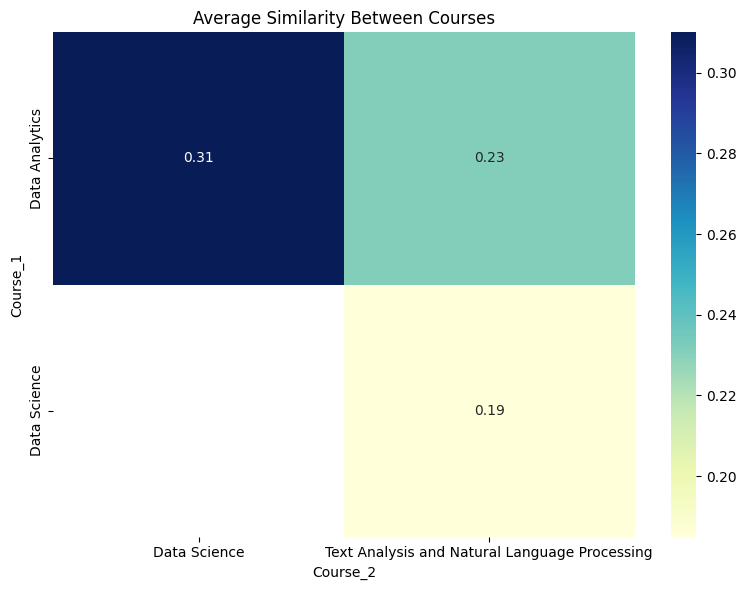

In [11]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load your Excel file (adjust path if needed)
df = pd.read_excel('C:/Users/Nastaran/Desktop/UniversityConstructor/semester4/Final 08042025/Data/Syllabus.xlsx')  # جایگزین کن با نام فایل خودت
df.dropna(subset=['Topic'], inplace=True)  # حذف سطرهای خالی

# 2. Embed topics using SBERT
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(df['Topic'].tolist(), convert_to_tensor=False)

# 3. Calculate cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# 4. Convert matrix to DataFrame for better handling
sim_df = pd.DataFrame(similarity_matrix, index=df['Topic'], columns=df['Topic'])

# 5. Filter for similar pairs (> 0.5), exclude self-comparisons
similar_pairs = []
for i in range(len(sim_df)):
    for j in range(i+1, len(sim_df)):
        score = sim_df.iloc[i, j]
        if score > 0.5:
            similar_pairs.append({
                'Topic_1': df.iloc[i]['Topic'],
                'Course_1': df.iloc[i]['Course'],
                'Topic_2': df.iloc[j]['Topic'],
                'Course_2': df.iloc[j]['Course'],
                'Similarity': round(score, 3)
            })

similar_df = pd.DataFrame(similar_pairs)

# 6. Save similar topic pairs to Excel
similar_df.to_excel('C:/Users/Nastaran/Desktop/UniversityConstructor/semester4/Final 08042025/Data/similar_topics_above_50.xlsx', index=False)

# 7. Find overall course-to-course similarity
df['Embedding'] = list(embeddings)
course_grouped = df.groupby('Course')['Embedding'].apply(list)

course_similarities = []
course_names = course_grouped.index.tolist()

for i in range(len(course_names)):
    for j in range(i+1, len(course_names)):
        emb1 = course_grouped.iloc[i]
        emb2 = course_grouped.iloc[j]
        sims = cosine_similarity(emb1, emb2)
        mean_sim = sims.mean()
        course_similarities.append({
            'Course_1': course_names[i],
            'Course_2': course_names[j],
            'Average_Similarity': round(mean_sim, 3)
        })

course_sim_df = pd.DataFrame(course_similarities)
course_sim_df.to_excel('course_level_similarity.xlsx', index=False)

# 8. Plot heatmap for course-to-course similarity
pivot = course_sim_df.pivot(index='Course_1', columns='Course_2', values='Average_Similarity')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Average Similarity Between Courses')
plt.tight_layout()
plt.savefig('course_similarity_heatmap.png')
plt.show()


In [12]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

sent1 = "Supervised Learning: A recap on Linear regression"
sent2 = "Supervised Learning: Classification"

embeddings = model.encode([sent1, sent2], convert_to_tensor=True)
similarity_score = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()

print(f"Similarity Score: {round(similarity_score, 3)}")


Similarity Score: 0.789
